<a href="https://colab.research.google.com/github/nando645/P4_Kamis_FGD1_LinierRegress/blob/main/P4_Kamis_FGD1_Liniear_Regression_Kel1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Necessary Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Loading Dataset Insurance


In [ ]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

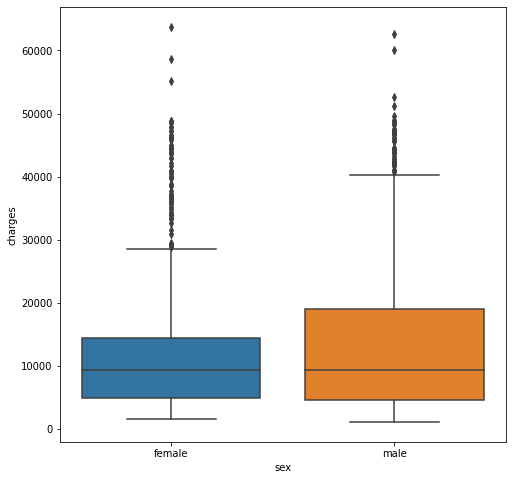

In [ ]:
aaa = plt.subplots(figsize=(8,8))
aaa = sns.boxplot(x="sex", y="charges", data=df)

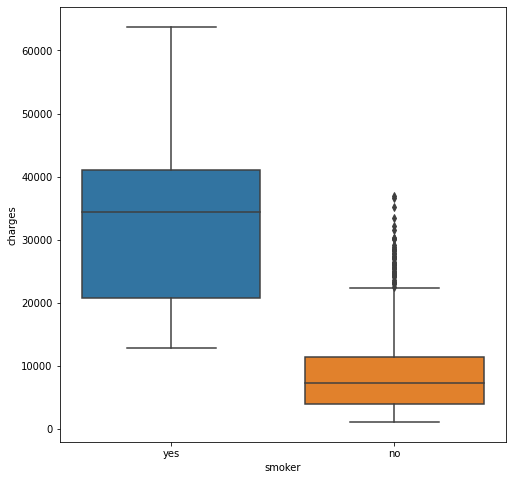

In [ ]:
aaa = plt.subplots(figsize=(8,8))
aaa = sns.boxplot(x="smoker", y="charges", data=df)

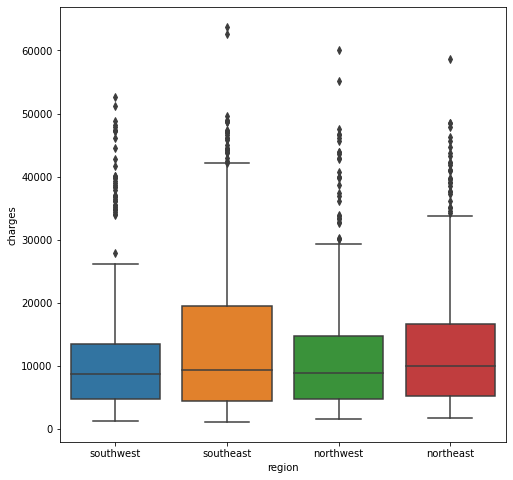

In [ ]:
aaa = plt.subplots(figsize=(8,8))
aaa = sns.boxplot(x="region", y="charges", data=df)

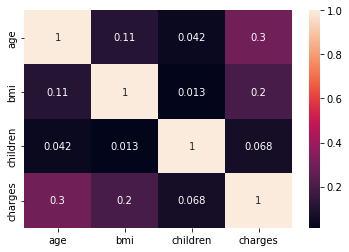

In [ ]:
sns.heatmap(df.corr(), annot=True)

In [ ]:
dummies = pd.get_dummies(df.region)
df = pd.concat([df, dummies], axis='columns')
df = df.drop(['region'], axis=1)
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,16884.92400,0,0,0,1
1,18,male,33.770,1,no,1725.55230,0,0,1,0
2,28,male,33.000,3,no,4449.46200,0,0,1,0
3,33,male,22.705,0,no,21984.47061,0,1,0,0
4,32,male,28.880,0,no,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830,0,1,0,0
1334,18,female,31.920,0,no,2205.98080,1,0,0,0
1335,18,female,36.850,0,no,1629.83350,0,0,1,0
1336,21,female,25.800,0,no,2007.94500,0,0,0,1


In [ ]:
cols = list(df.columns)
a, b = cols.index('charges'), cols.index('southwest')
cols[b], cols[a] = cols[a], cols[b]
df = df[cols]

In [ ]:
df

,age,sex,bmi,children,smoker,southwest,northeast,northwest,southeast,charges
0,19,female,27.900,0,yes,1,0,0,0,16884.92400
1,18,male,33.770,1,no,0,0,0,1,1725.55230
2,28,male,33.000,3,no,0,0,0,1,4449.46200
3,33,male,22.705,0,no,0,0,1,0,21984.47061
4,32,male,28.880,0,no,0,0,1,0,3866.85520
...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,0,0,1,0,10600.54830
1334,18,female,31.920,0,no,0,1,0,0,2205.98080
1335,18,female,36.850,0,no,0,0,0,1,1629.83350
1336,21,female,25.800,0,no,1,0,0,0,2007.94500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   object 
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   object 
 5   southwest  1338 non-null   uint8  
 6   northeast  1338 non-null   uint8  
 7   northwest  1338 non-null   uint8  
 8   southeast  1338 non-null   uint8  
 9   charges    1338 non-null   float64
dtypes: float64(2), int64(2), object(2), uint8(4)
memory usage: 68.1+ KB


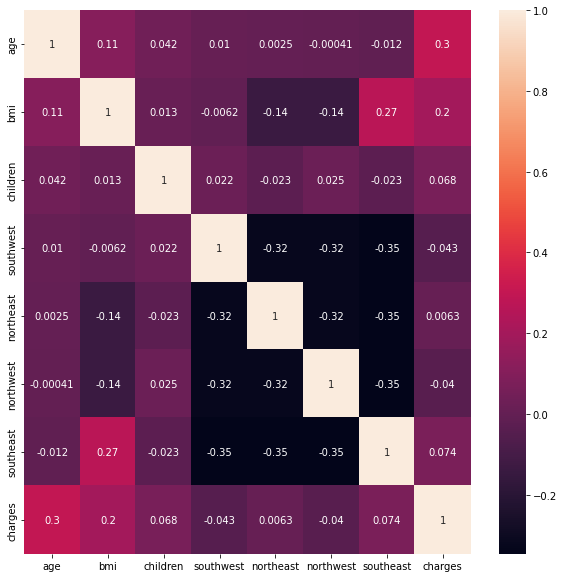

In [ ]:
# checking correlation using heatmap
  
#ploting the heatmap for correlation
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

In [ ]:
# Mengubah value sex menjadi 1 (male) dan 0 (female)
df = df.replace({'sex': {'male': 1, 'female': 0}})

In [ ]:
# Mengubah value smoker menjadi 1 (yes) dan 0 (no)
df = df.replace({'smoker': {'yes': 1, 'no': 0}})

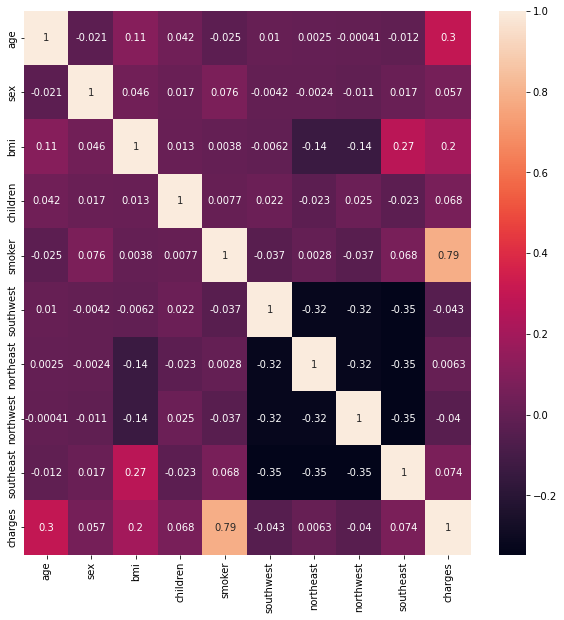

In [ ]:
ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df.corr(), annot=True)

# Train & Test Model

In [ ]:
# Menentukan variabel independen dan dependen
x = df.iloc[:,:-1] # variabel independen
y = df['charges'] # variabel dependen

In [ ]:
# Fitting Multiple Linear Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() 
regressor.fit(x, y)

LinearRegression()

In [ ]:
print("Intercept:", regressor.intercept_) # This is the y-intercept 
print("Coefficients of predictors:", regressor.coef_) # These are the weights or regression coefficients.

Intercept: -12525.547811195462
Coefficients of predictors: [  256.85635254  -131.3143594    339.19345361   475.50054515
 23848.53454191  -373.04175627   587.00923503   234.0453356
  -448.01281436]


# Prediksi Nilai

In [ ]:
a = x.iloc[150]
a.values

array([35.  ,  1.  , 24.13,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  ])

In [ ]:
pred_a = regressor.predict(a.values.reshape(1, -1))
print("predicted value:", pred_a[0])

predicted value: 5227.394084598931


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
print("actual value:", y[150])

actual value: 5125.2157


As you can see the predicted value is not very far away from the actual value.

Now let's try to predict the price for all the houses in the dataset.

In [ ]:
# Predicting the results
y_pred = regressor.predict(x)
y_pred[:10]

array([25293.7130284 ,  3448.60283431,  6706.9884907 ,  3754.83016298,
        5592.49338649,  3719.82579905, 10659.96122506,  8047.9106069 ,
        8502.97391983, 11884.63751795])

<div class="alert alert-block alert-success">Great! now, let's put the predicted values next to the actual values and see how good a job have we done!</div>

In [ ]:
prices = pd.DataFrame({"actual": y,
          "predicted": y_pred})
prices.head(10)

,actual,predicted
0,16884.92400,25293.713028
1,1725.55230,3448.602834
2,4449.46200,6706.988491
3,21984.47061,3754.830163
4,3866.85520,5592.493386
5,3756.62160,3719.825799
6,8240.58960,10659.961225
7,7281.50560,8047.910607
8,6406.41070,8502.973920
9,28923.13692,11884.637518


<br><br><br>
## Measuring the goodness of fit
***
Must say we have done a reasonably good job of predicting the house prices.

However, as the number of predictions increase it would be difficult to manually check the goodness of fit. In such a case, we can use the cost function to check the goodness of fit.

<div class="alert alert-block alert-success">Let's find the r2_score</div>


In [ ]:
from sklearn.metrics import r2_score
print(f"Nilai R2 = {r2_score(y,y_pred)}")

Nilai R2 = 0.7509130345985207


<br><br><br>
### Other evaluation metrics for Regression
***
    - Evaluating our model will help us know how well we're doing with our current selection of Features from the data, hyperparameters, etc. 
    
- There are three basic evaluation metrics for regression to check the goodness of fit.

    - Mean Absolute Error
    - Root Mean square Error
    - R-Square (Residual value)

# RMSE

In [ ]:
from sklearn.metrics import mean_squared_error

rms = mean_squared_error(y, y_pred, squared=False)
print(f"Nilai root mean square error = {rms}")

Nilai root mean square error = 6041.6796511744515


### Thank You !!!